# Importing Libraries

In [1221]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Test set Image Processing

In [1222]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Shanvi/Desktop/dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 54 files belonging to 3 classes.


# Loading Model

In [1223]:
cnn = tf.keras.models.load_model('C:/Users/Shanvi/Desktop/fridge/new_model.h5')

#Visualising and Performing Prediction on Single image

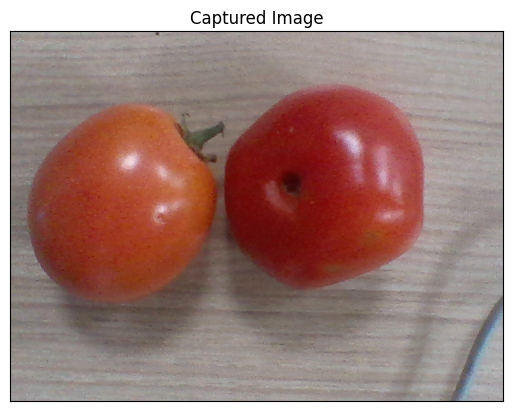

Image saved at: captured_image.jpg


In [1224]:
import cv2
import matplotlib.pyplot as plt

# Load pre-trained object detection model (for example, using TensorFlow's Object Detection API)
# You need to replace this with the actual code to load your object detection model
# For example, if using TensorFlow Object Detection API:
# import tensorflow as tf
# detection_model = tf.saved_model.load(PATH_TO_SAVED_MODEL)

# Function to capture image from live camera feed and perform object detection
def capture_and_detect(save_path):
    # Open the first camera device (0)
    cap = cv2.VideoCapture(0)
    
    # Check if the camera is opened successfully
    if not cap.isOpened():
        print("Error: Unable to open camera")
        return
    
    # Read a frame from the camera
    ret, frame = cap.read()
    
    # Check if the frame is read successfully
    if not ret:
        print("Error: Unable to capture frame")
        cap.release()
        return
    
    # Convert frame from BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Perform object detection on the frame using the pre-trained model
    # Replace this with the actual code to perform object detection
    # For example, if using TensorFlow Object Detection API:
    # detections = detection_model(frame_rgb)
    
    # Display the captured frame
    plt.imshow(frame_rgb)
    plt.title('Captured Image')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    # Save the captured image
    img = cv2.imwrite(save_path, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    print(f"Image saved at: {save_path}")
    
    # Release the camera
    cap.release()

# Specify the path to save the captured image
save_path = 'captured_image.jpg'

# Call the function to capture image from live camera and perform object detection
capture_and_detect(save_path)


#Testing Model

In [1225]:
image_path= 'captured_image.jpg'
img = cv2.imread(image_path)


In [1226]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


In [1227]:
print(predictions)

[[0.13478121 0.00240826 0.8628105 ]]


In [1228]:
# test_set.class_names

In [1229]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


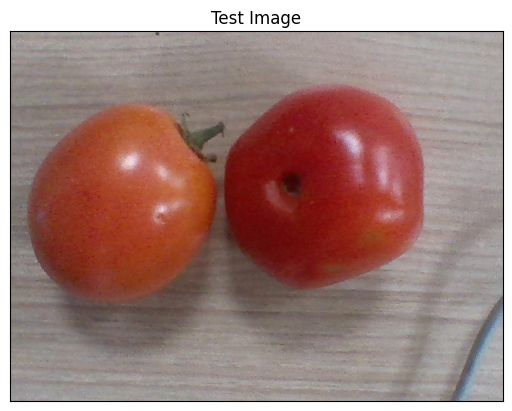

In [1230]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [1231]:
# #Single image Prediction
# print("It's a {}".format(test_set.class_names[result_index]))
# Veg_name= test_set.class_names[result_index]


#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))
Veg_name= test_set.class_names[result_index]

It's a Tomatoes


In [1232]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Shanvi/Desktop/freshdataset/Foodection Dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1400 files belonging to 4 classes.


In [1233]:
cnn = tf.keras.models.load_model('C:/Users/Shanvi/Desktop/fridge/fresh_model.h5')

In [1234]:
predictions = cnn.predict(input_arr)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
[[1.7470318e-04 9.9982148e-01 4.0209120e-08 3.8581725e-06]]


In [1235]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


In [1236]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))
frehsness = test_set.class_names[result_index]

It's a Medium Fresh tomatoes


In [1237]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Shanvi/Desktop/data/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 240 files belonging to 2 classes.


In [1238]:
cnn = tf.keras.models.load_model('C:/Users/Shanvi/Desktop/fridge/gram_model.h5')

In [1239]:
predictions = cnn.predict(input_arr)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
[[1.0000000e+00 4.3316557e-08]]


In [1240]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


In [1241]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))
grams = test_set.class_names[result_index]

It's a 150 grams


In [1242]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [1243]:
%sql sqlite:///freshness.db

In [1244]:
%%sql
CREATE TABLE IF NOT EXISTS config_test (
    name VARCHAR(20),
    value INT,
    grams VARCHAR(20)
)

   sqlite:///fresh.db
 * sqlite:///freshness.db
Done.


[]

In [1245]:
result_name = "Medium Fresh tomatoes"  # For testing purposes, assuming a value
if result_name == "Medium Fresh tomatoes":
    days = 3
    print(result_name)

    # Execute the SQL query using %sql magic command
    %sql INSERT INTO config_test (name, value, grams) VALUES (:Veg_name, :days, :grams)


Medium Fresh tomatoes
   sqlite:///fresh.db
 * sqlite:///freshness.db
1 rows affected.


In [1246]:
%sql select * from config_test

   sqlite:///fresh.db
 * sqlite:///freshness.db
Done.


name,value,grams
Medium Fresh tomatoes,3,89 grams
Brinjal,3,89 grams
Brinjal,3,89 grams
Tomatoes,3,89 grams
Tomatoes,3,89 grams
Tomatoes,3,89 grams
Brinjal,3,89 grams
Tomatoes,3,65 grams
Tomatoes,3,89 grams
Brinjal,3,65 grams
